# MATH 541 Data Analysis and Statistical Learning
## Assignment 3 PCA
## Course Instructor- Dr. Rustem Takhanov
## Done by Jamil Zhumabek

Our dataset is uploaded from the Scikit-learn library and is used to load the 20 Newsgroups dataset in a preprocessed, vectorized format.
It designed for text classification and clustering tasks, providing a collection of newsgroup documents.
It contains posts from 20 different newsgroups, each corresponding to a different topic or category (e.g., sports, technology, politics).
But, the issue is that it contains 11,314 samples (rows).
Each sample is represented by 130,107 features (columns).
As a result, operations like standardization of features or PCA become computationally expensive.
So, we take only 5% of the original dataset.


In [ ]:

# Load the dataset
data = fetch_20newsgroups_vectorized()

# Check the dataset information
print("Feature matrix shape:", data.data.shape)
print("Target vector shape:", data.target.shape)

# Display a sample
print("Sample data (vectorized):", data.data[0])
print("Corresponding target:", data.target[0])


Feature matrix shape: (11314, 130107)
Target vector shape: (11314,)
Sample data (vectorized):   (0, 5022)	0.017109647770728872
  (0, 5886)	0.017109647770728872
  (0, 6214)	0.017109647770728872
  (0, 6216)	0.017109647770728872
  (0, 6281)	0.017109647770728872
  (0, 6286)	0.017109647770728872
  (0, 6324)	0.017109647770728872
  (0, 6331)	0.017109647770728872
  (0, 6403)	0.017109647770728872
  (0, 11391)	0.017109647770728872
  (0, 13930)	0.017109647770728872
  (0, 15094)	0.017109647770728872
  (0, 15251)	0.017109647770728872
  (0, 15530)	0.017109647770728872
  (0, 16731)	0.017109647770728872
  (0, 20228)	0.017109647770728872
  (0, 26214)	0.017109647770728872
  (0, 26806)	0.017109647770728872
  (0, 27436)	0.017109647770728872
  (0, 27618)	0.017109647770728872
  (0, 27645)	0.017109647770728872
  (0, 27901)	0.017109647770728872
  (0, 28012)	0.05132894331218662
  (0, 28146)	0.41063154649749295
  (0, 28421)	0.034219295541457743
  :	:
  (0, 123218)	0.017109647770728872
  (0, 123292)	0.0171096477

So, below is the RAM consumption even on the 10% of the original dataset. So we reduce it to 5% instead. We have now 565 data points.

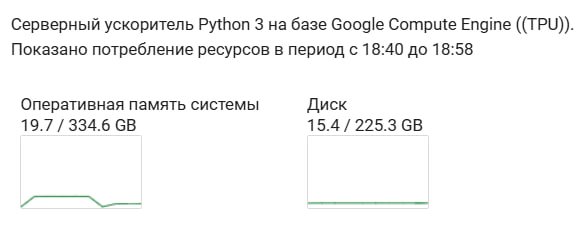

We use StandardScaler to standardize the features of the dataset, ensuring that all features have unit variance and no feature dominates due to its scale.

Original dataset size: 11314
Subset dataset size: 565


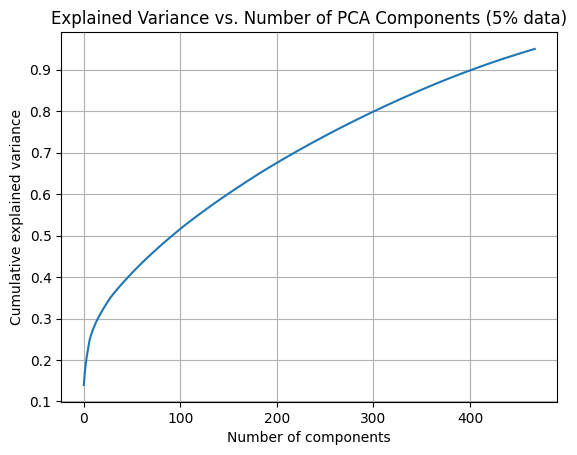

Reduced to 468 components.


In [ ]:
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = fetch_20newsgroups_vectorized()
features = data.data
labels = data.target

# Convert sparse matrix to dense if required (PCA needs dense input)
features = features.toarray()

# Use only 5% of the data
sample_size = int(0.05 * features.shape[0])  # Calculate 5% of the data
random_indices = np.random.choice(features.shape[0], sample_size, replace=False)

# Subset the features and labels
subset_features = features[random_indices]
subset_labels = labels[random_indices]

print(f"Original dataset size: {features.shape[0]}")
print(f"Subset dataset size: {subset_features.shape[0]}")

# Standardize the features
scaler = StandardScaler(with_mean=False)  # Set with_mean=False for sparse-like data
scaled_features = scaler.fit_transform(subset_features)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
reduced_features = pca.fit_transform(scaled_features)

# Visualize Explained Variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(explained_variance)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained Variance vs. Number of PCA Components (5% data)")
plt.grid()
plt.show()

print(f"Reduced to {reduced_features.shape[1]} components.")

On the plot, we can observe that the curve rises quickly at the beginning, indicating that the first few components capture a significant portion of the variance. We can observe also, that the curve starts to plateau around k=300. It means that additional components contribute less variance beyond this point.

According to the output, 95% of the variance is preserved using only 468 components. This means that dimensionality of the dataset can be reduced to 468 while preserving 95% of the dataset's information.


**So, hidden dimension in our case will be approximately 468.**